In [532]:
import pandas as pd
import json 
from sodapy import Socrata
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingClassifier as gb 
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as sc
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier as xg
import seaborn as sns 
import numpy as np 

In [467]:
dfo=pd.read_csv(r'C:\Users\mmioi\OneDrive\Documents\springboard\projects\mamer alomari code training\Untitled Folder\data\finaldb.csv')

In [468]:
dfo.columns

Index(['Unnamed: 0', 'Date', 'latitude', 'longitude', 'parent_incident_type',
       'log', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Holiday_4th of July', 'Holiday_Christmas Day',
       'Holiday_Christmas Eve', 'Holiday_Columbus Day',
       'Holiday_Eastern Easter', 'Holiday_Juneteenth', 'Holiday_Labor Day',
       'Holiday_Labor Day Weekend', 'Holiday_Martin Luther King, Jr. Day',
       'Holiday_Memorial Day', 'Holiday_New Year's Day',
       'Holiday_New Year’s Eve', 'Holiday_Thanksgiving Day',
       'Holiday_Thanksgiving Eve', 'Holiday_Valentine’s Day',
       'Holiday_Veterans Day', 'Holiday_Washington's Birthday',
       'Holiday_Western Easter', 'event', 'year', 'month', 'day', 'hour',
       'minute', 'zip', 'neighborhood'],
      dtype='object')

In [470]:
dfo=dfo.drop('Unnamed: 0',axis=1)

In [476]:
dfo.Date=pd.to_datetime(dfo.Date)

In [477]:
dfo=dfo.set_index('Date')

In [478]:
dfo=dfo.loc['01-01-2018':]

In [516]:
X=dfo.drop('parent_incident_type',axis=1)
y=dfo.parent_incident_type

In [517]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Learning rate=0.25,n_estimators=150,random_state =0,eval_metric='auc', use_label_encoder=False,param = {'max_depth': 6, 'eta': 2, 'objective': 'binary:logistic'}\
num_round=3

# under sampling  

In [499]:
count_class_0, count_class_1,count_class_2 = dfo.parent_incident_type.value_counts()
df_class_0 = dfo[dfo['parent_incident_type'] == 0]
df_class_1 = dfo[dfo['parent_incident_type'] == 1]
df_class_2=dfo[dfo['parent_incident_type'] == 2]
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1+1000 )
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.parent_incident_type.value_counts())
X=df_test_under.drop('parent_incident_type',axis=1).values
Y=df_test_under.parent_incident_type.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)


Random under-sampling:
0.0    14644
1.0    13644
Name: parent_incident_type, dtype: int64


In [518]:
gb = xg(n_estimators=150, learning_rate =0.25, random_state =0,num_class=2,objective='multi:softprob',eval_metric='auc', use_label_encoder=False)
gb.fit(X_train, y_train)
ypred=gb.predict(X_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.7157909427116043
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      9936
         1.0       0.56      0.32      0.41      4120
         2.0       0.25      0.00      0.01       275

    accuracy                           0.72     14331
   macro avg       0.52      0.41      0.41     14331
weighted avg       0.68      0.72      0.68     14331



In [7]:
train_frac = 0.33
test_frac = 0.33

train_X = df[[c for c in df.columns if c != 'parent_incident_type']].iloc[:int(len(df) * train_frac)].values
train_y = df.parent_incident_type.iloc[:int(len(df) * train_frac)].values
test_X = df[[c for c in df.columns if c != 'parent_incident_type']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
test_y = df.parent_incident_type.iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
valid_X = df[[c for c in df.columns if c != 'parent_incident_type']].iloc[int(len(df) * (train_frac+test_frac)):].values
valid_y = df.parent_incident_type.iloc[int(len(df) * (train_frac+test_frac)):].values

In [8]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

balanced data is producing the best outcomes when in it comes to predicting violent and sexual which are meshed into one category for the time being

In [9]:
model_to_clf = {
    'rf': RandomForestClassifier,
    'xgb': xg,
    'nb': GaussianNB
               }

In [10]:
model_to_probs = {}
model_str_to_trained_model = {}

# plotting predicted probabilities

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


C:\Users\mmioi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mmioi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<class 'xgboost.sklearn.XGBClassifier'>
[11:05:19] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mmioi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mmioi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mmioi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

<class 'sklearn.naive_bayes.GaussianNB'>


C:\Users\mmioi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mmioi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


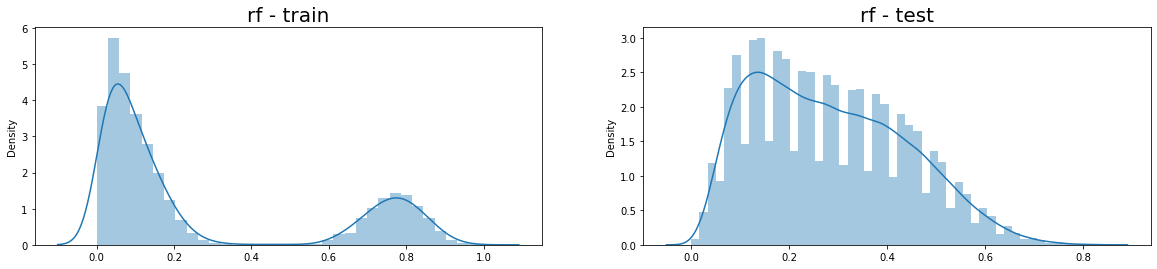

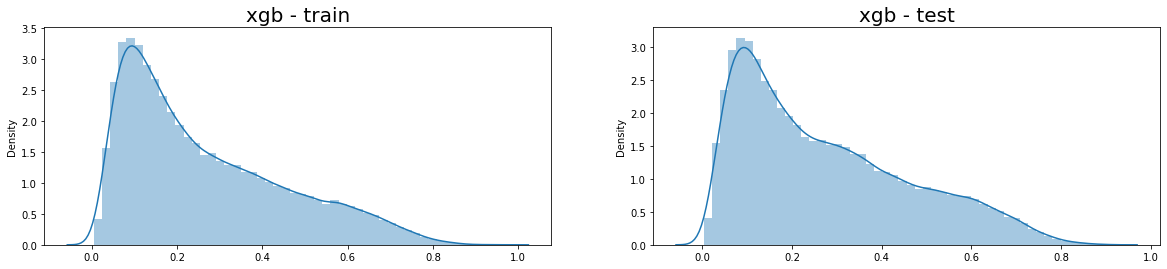

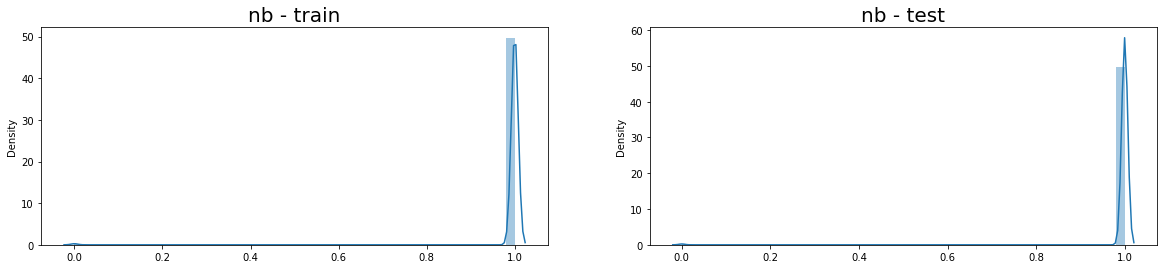

In [11]:
for model_str, model in model_to_clf.items():
    print(model)
    if model == SVC:
        clf = model(probability=True)
    elif model == LogisticRegression:
        clf = model(solver='liblinear')
    else:
        clf = model()
    clf.fit(train_X, train_y)

    
    pred_probs_train = clf.predict_proba(train_X)[:,1]
    pred_probs_test = clf.predict_proba(test_X)[:,1]
    pred_probs_valid = clf.predict_proba(valid_X)[:,1]
    model_to_probs[model_str] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}
    plt.figure(figsize=(20,4))
    
    plt.subplot(1,2,1)
    sns.distplot(pred_probs_train)
    plt.title(f"{model_str} - train", fontsize=20)
    
    plt.subplot(1,2,2)
    sns.distplot(pred_probs_test)
    plt.title(f"{model_str} - test", fontsize=20)
    
    model_str_to_trained_model[model_str] = clf

# predicted probababilities vs empirical probabilities

C:\Users\mmioi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mmioi\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


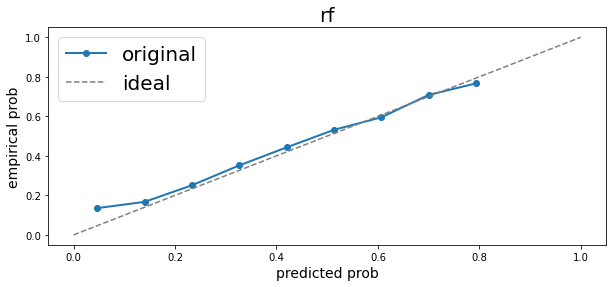

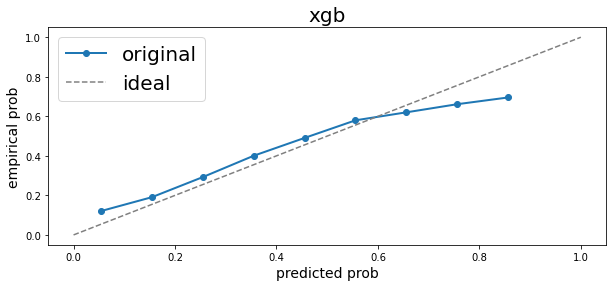

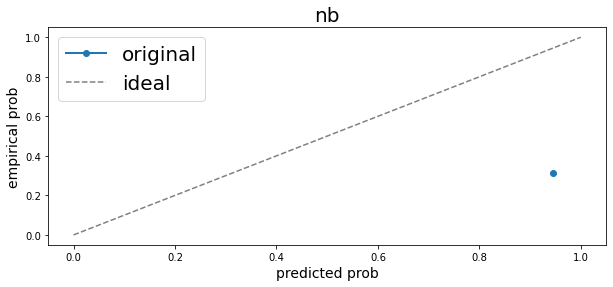

In [12]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(test_y[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

Can't really perform any prob calibration since both models are infact producing probabilities close to the ideal 

# predicting locations 

In [ ]:
from sklearn.cluster import KMeans 

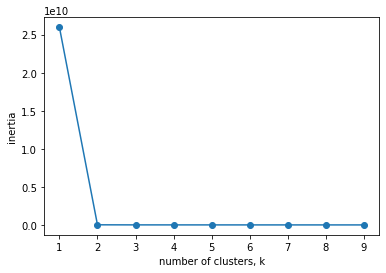

In [504]:
xtrain,xtest=train_test_split(df,test_size=0.3,random_state=123)
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


clustering isn't the way to go 

In [506]:
dfo.columns

Index(['latitude', 'longitude', 'parent_incident_type', 'log', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Holiday_4th of July', 'Holiday_Christmas Day', 'Holiday_Christmas Eve',
       'Holiday_Columbus Day', 'Holiday_Eastern Easter', 'Holiday_Juneteenth',
       'Holiday_Labor Day', 'Holiday_Labor Day Weekend',
       'Holiday_Martin Luther King, Jr. Day', 'Holiday_Memorial Day',
       'Holiday_New Year's Day', 'Holiday_New Year’s Eve',
       'Holiday_Thanksgiving Day', 'Holiday_Thanksgiving Eve',
       'Holiday_Valentine’s Day', 'Holiday_Veterans Day',
       'Holiday_Washington's Birthday', 'Holiday_Western Easter', 'event',
       'year', 'month', 'day', 'hour', 'minute', 'zip', 'neighborhood'],
      dtype='object')

In [543]:
dfo.zip=dfo.zip.astype(str)

In [544]:
from sklearn.preprocessing import LabelEncoder as le 
le=le()
dfo.zip=le.fit_transform(dfo.zip)

In [538]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47768 entries, 2018-01-01 00:00:00 to 2021-08-31 02:35:24
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             47768 non-null  float64
 1   longitude                            47768 non-null  float64
 2   parent_incident_type                 47768 non-null  float64
 3   log                                  47768 non-null  float64
 4   Friday                               47768 non-null  float64
 5   Monday                               47768 non-null  float64
 6   Saturday                             47768 non-null  float64
 7   Sunday                               47768 non-null  float64
 8   Thursday                             47768 non-null  float64
 9   Tuesday                              47768 non-null  float64
 10  Wednesday                            47768 non-null  float6

In [545]:

x=dfo.drop('zip',axis=1).values
Y=dfo['zip'].values

In [546]:
sc=sc()
x=sc.fit_transform(x)

TypeError: 'StandardScaler' object is not callable

In [547]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=0)

In [548]:
gb = xg(n_estimators=150, learning_rate =0.25, random_state =0,num_class=2,objective='multi:softmax',eval_metric='auc', use_label_encoder=False)
gb.fit(X_train, y_train)
ypred=gb.predict(X_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.719977670783616
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.77      0.68      0.72       655
           2       0.55      0.59      0.57       497
           3       0.44      0.42      0.43       368
           4       0.72      0.72      0.72       527
           5       0.67      0.67      0.67       887
           6       0.91      0.91      0.91      1231
           7       0.78      0.85      0.81       608
           8       0.25      0.13      0.17       381
           9       0.79      0.74      0.76       543
          10       0.69      0.75      0.72      1572
          11       0.45      0.43      0.44       729
          12       0.81      0.78      0.80      1117
          13       0.60      0.70      0.65       881
          14       0.83      0.75      0.79      2222
          15       0.83      0.78      0.80       955
          16       0.00      0.00      0.00         4
         

C:\Users\mmioi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmioi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmioi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
